In [94]:
import os
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.dates as mdates

from datetime import datetime, timedelta

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [95]:
#import dataset
df = pd.read_csv('df_bike_example.csv', index_col='Date')
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')
df

,Rented_Bikes,Temperature,Humidity_percent
Date,,,
2017-12-01,9539,-2.454167,45.875000
2017-12-02,8523,1.325000,61.958333
2017-12-03,7222,4.875000,81.541667
2017-12-04,8729,-0.304167,52.500000
2017-12-05,8307,-4.458333,36.416667
...,...,...,...
2018-11-26,17162,6.320833,70.500000
2018-11-27,16282,7.066667,68.000000
2018-11-28,16524,5.304167,25.791667


In [96]:
#for ARIMA modles we don't neet the other variables
df = df[['Rented_Bikes']]

In [97]:
#train and test slice
pred_from = datetime(2018,10,1)
pred_until = datetime(2018,11,30)

df_train = df[:pred_from - timedelta(days=1)]
df_test = df[pred_from:]

In [72]:
#create AR(2) model 
model = ARIMA(df_train, order=(2,0,0))
model_fit = model.fit()

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [73]:
pred = model_fit.predict(start=pred_from, end=pred_until)
df_test['pred'] = pred

/Users/amitsasson/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
#create ARMA(2,2) model 
model = ARIMA(df_train, order=(2,0,1))
model_fit = model.fit()

pred = model_fit.predict(start=pred_from, end=pred_until)
df_test['pred'] = pred

sqrt(mean_squared_error(df_test['Rented_Bikes'], df_test['pred']))

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


8491.56610337574

<AxesSubplot:xlabel='Date'>

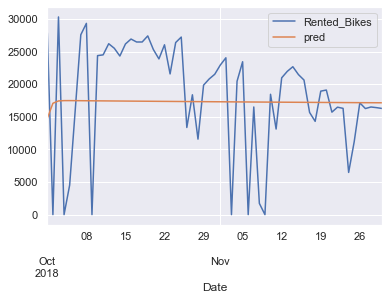

In [75]:
#plot predictions vs. actual values 
df_test.plot()


In [104]:
model = SARIMAX(df_train, order=(2, 0, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()
pred = model_fit.predict(start=pred_from, end=pred_until)
df_test['pred'] = pred
sqrt(mean_squared_error(df_test['Rented_Bikes'], pred))

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


8565.268430579368

<AxesSubplot:xlabel='Date'>

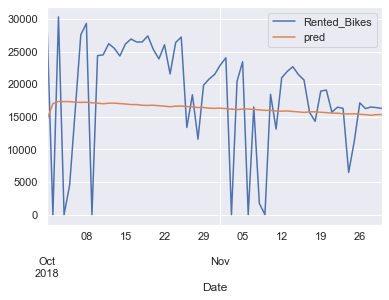

In [105]:
df_test.plot()

In [101]:
df_test

,Rented_Bikes,pred
Date,,
2018-10-01,27909,15276.723370
2018-10-02,0,16594.145975
2018-10-03,30349,16740.627613
2018-10-04,0,16695.118610
2018-10-05,4522,16616.674048
...,...,...
2018-11-26,17162,14759.227367
2018-11-27,16282,14708.995689
2018-11-28,16524,14639.076083


In [102]:
pred

2018-10-01    15276.723370
2018-10-02    16594.145975
2018-10-03    16740.627613
2018-10-04    16695.118610
2018-10-05    16616.674048
                  ...     
2018-11-26    14759.227367
2018-11-27    14708.995689
2018-11-28    14639.076083
2018-11-29    14655.772166
2018-11-30    14605.897646
Freq: D, Name: predicted_mean, Length: 61, dtype: float64